In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import time

In [5]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,55,112656,92393,581,113,2,23.54,36,0.15,0
1,56,91569,131575,641,54,1,15.19,12,0.43,0
2,26,78169,75417,569,105,3,18.02,12,0.29,0
3,26,63033,10804,326,118,1,14.71,24,0.41,0
4,24,29665,21182,662,102,3,15.02,60,0.69,0


In [8]:
df.shape

(25535, 10)

In [10]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [26]:
X = df.drop(columns="Default")
y = df["Default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = LogisticRegression()
start = time.perf_counter()  # Eğitim zamanı ölçümü başlatılıyor
model.fit(X_train, y_train)
train_time = time.perf_counter() - start  # Eğitim süresi hesaplanıyor

In [30]:
start = time.perf_counter()  # Test zamanı ölçümü başlatılıyor
y_pred = model.predict(X_test)
predict_time = time.perf_counter() - start  # Test süresi hesaplanıyor

In [32]:
print(f"Modelin eğitim süresi: {train_time:.5f} saniye")
print(f"Modelin tahmin süresi: {predict_time:.5f} saniye")

Modelin eğitim süresi: 0.00817 saniye
Modelin tahmin süresi: 0.00034 saniye


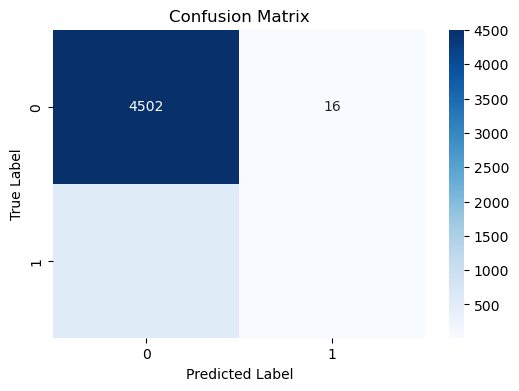

In [20]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()